# Astronomical Data Imaging

## Author: Tanmoy Bhowmik
* Undergraduate Student,Dept. of Physics (SUST) 
* Research Intern at Institute of Astrophysics and Space Sciences, Portugal and UC Berkeley

## Objective

To analyze, process, and visualize astronomical data from various sources, integrating image data from different filters (such as X-ray, IR, and RGB images) to create meaningful and informative composite image.

## Keyword: Noise reduction,Stack , RGB,X-ray,IR, Composite,Gaussian Distribution, Median Filter, Skimage, Wavelength, Doppler shift.


## Required dependencies
* Python modules
* python 3
* astropy
* numpy
* matplotlib
* scipy
* scikit-image or skimage

# Module Installation 

In [1]:
pip install numpy astropy matplotlib scikit-image

Note: you may need to restart the kernel to use updated packages.


# Import Packages

In [23]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm

# Load the image data from the FITS files

In [24]:
G = fits.open('n2207_OPT_G.fits')
R = fits.open('n2207_OPT_R.fits')
B = fits.open('n2207_OPT_B.fits')

# Header Info Check

In [25]:
# Import the necessary library
from astropy.io import fits

# Replace the path with your FITS file path
file_path = "n2207_OPT_B.fits"

# Open the FITS file
with fits.open(file_path) as hdul:
    # Access the header of the primary HDU (index 0)
    header = hdul[0].header
    
    # Print each header line
    for key, value in header.items():
        print(f"{key}: {value}")


SIMPLE: True
BITPIX: 16
NAXIS: 2
NAXIS1: 3600
NAXIS2: 1742
EXTEND: True
COMMENT:   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT:   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
BZERO: 32768
BSCALE: 1
PROGRAM: PixInsight 01.08.03.1123
COMMENT: PixInsight Class Library: PCL 02.00.13.0692
COMMENT: FITS module version 01.01.02.0288
COLORSPC: Grayscale
RESOLUTN: 300.0
RESOUNIT: inch
DATE: 2014-11-13
ORIGIN: CXCs PinpointWCS
WCSAXES: 2.0
WCSNAME: Primary WCS
EQUINOX: 2000.0
RADESYS: ICRS
CTYPE1: RA---TAN
CRPIX1: 1800.0
CRVAL1: 94.1050985399028
CUNIT1: deg
CTYPE2: DEC--TAN
CRPIX2: 871.0
CRVAL2: -21.3751199269575
CUNIT2: deg
CD1_1: -2.18209916978579e-05
CD1_2: 4.71075682288385e-06
CD2_1: 4.5701617231002e-06
CD2_2: 2.17108058178009e-05


# Extract the image data arrays

In [26]:
green_image = G[0].data
red_image = R[0].data
blue_image = B[0].data

# Normalize the images

In [27]:
norm_green = simple_norm(green_image, 'sqrt', percent=99.5)
norm_red = simple_norm(red_image, 'sqrt', percent=99.5)
norm_blue = simple_norm(blue_image, 'sqrt', percent=99.5)

green_image_norm = norm_green(green_image)
red_image_norm = norm_red(red_image)
blue_image_norm = norm_blue(blue_image)

# Stack the images to create an RGB image 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


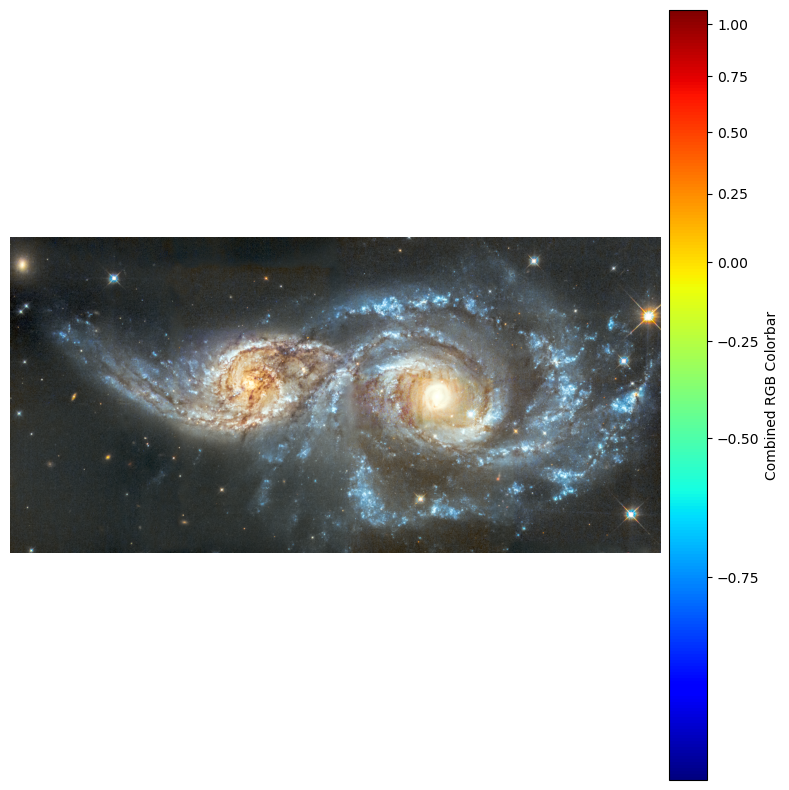

In [28]:
# Stack the images to create an RGB image
rgb_image = np.stack([red_image_norm, green_image_norm, blue_image_norm], axis=-1)

# Create a grayscale intensity image for the color bar
"""
It follows the standard method for converting RGB images to grayscale by applying the weights typically used in the RGB-to-grayscale conversion formula:

Red Channel Weight: 0.299
Green Channel Weight: 0.587
Blue Channel Weight: 0.114
This method accurately reflects the human eye's sensitivity to different colors, where green is the most sensitive and blue is the least.

"""
intensity_image = 0.299 * red_image_norm + 0.587 * green_image_norm + 0.114 * blue_image_norm

# Plot the RGB image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, origin='lower')

# Add a color bar based on the intensity image
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=simple_norm(intensity_image, 'sqrt'), cmap='jet'), ax=plt.gca(), orientation='vertical', pad=0.01)
cbar.set_label('Combined RGB Colorbar')

plt.axis('off')

plt.savefig('rgb_image_output.png')  # Save as PNG with 300 dpi resolution

plt.show()

# Close the FITS files
G.close()
R.close()
B.close()

# Orginal RGB to Noise reducted RGB using Median Filter

Median filter is a non-linear digital filtering technique, commonly used in image processing to reduce noise while preserving edges. Unlike linear filters, which can blur edges in images, the median filter is particularly effective for removing "salt-and-pepper" noise (random bright and dark pixels) without significantly distorting the edges of the image.
The size parameter of median_filter can be adjusted depending on the level of noise and the desired smoothing effect. A larger size will result in more smoothing.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


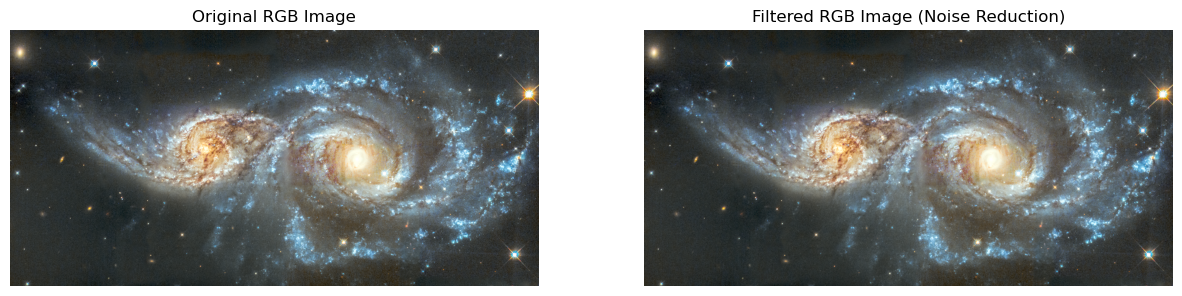

In [29]:
from scipy.ndimage import median_filter

# Apply median filter for noise reduction
# The size parameter defines the size of the neighborhood over which the filter is applied
filtered_red = median_filter(red_image_norm, size=3)
filtered_green = median_filter(green_image_norm, size=3)
filtered_blue = median_filter(blue_image_norm, size=3)

# Stack the images to create an RGB image
filtered_rgb_image = np.stack([filtered_red, filtered_green, filtered_blue], axis=-1)

# Plot the original and filtered images for comparison
plt.figure(figsize=(15, 15))

# Original Image
plt.subplot(1, 2, 1)
rgb_image = np.stack([red_image_norm, green_image_norm, blue_image_norm], axis=-1)
plt.imshow(rgb_image, origin='lower')
plt.title('Original RGB Image')
plt.axis('off')

# Filtered Image
plt.subplot(1, 2, 2)
plt.imshow(filtered_rgb_image, origin='lower')
plt.title('Filtered RGB Image (Noise Reduction)')
plt.axis('off')

plt.show()

# Close the FITS files
G.close()
R.close()
B.close()


# Unsharp Masking: Sharpening the Image
Unsharp masking is a technique used in image processing to enhance the sharpness of an image. It works by amplifying high-frequency components (edges) in the image, making edges and details.
## How Unsharp Masking Works
#### Blur the Image: The image is first blurred using a Gaussian filter. The degree of blurring is controlled by the sigma parameter.
#### Create the Mask: Subtract the blurred image from the original image to create a mask that represents the high-frequency components (details and edges).
#### Enhance the Edges: Add a weighted version of this mask back to the original image. The strength parameter controls how much of the mask is added back, thereby enhancing the details.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


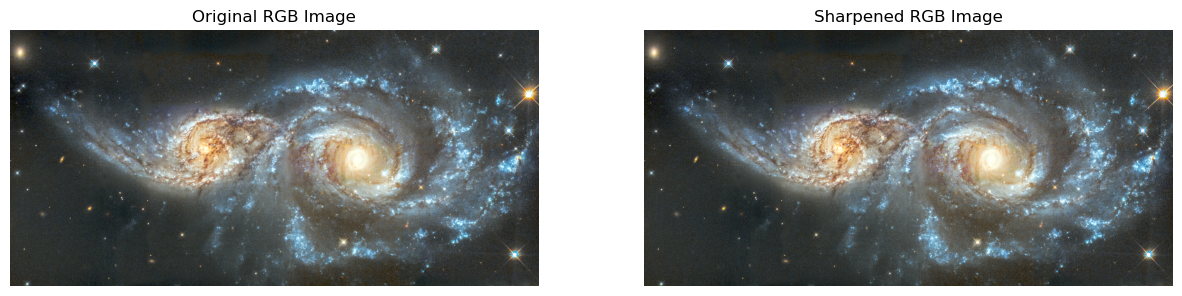

In [18]:
from scipy.ndimage import gaussian_filter, median_filter

# Unsharp Masking: Sharpening the Image
def unsharp_mask(image, sigma=1, strength=1.5):
    blurred = gaussian_filter(image, sigma=sigma)
    sharpened = image + strength * (image - blurred)
    return np.clip(sharpened, 0, 1)  # Clip to maintain valid intensity range

sharpened_red = unsharp_mask(filtered_red, sigma=1, strength=1.5)
sharpened_green = unsharp_mask(filtered_green, sigma=1, strength=1.5)
sharpened_blue = unsharp_mask(filtered_blue, sigma=1, strength=1.5)

# Stack the images to create an RGB image
sharpened_rgb_image = np.stack([sharpened_red, sharpened_green, sharpened_blue], axis=-1)

# Plot the original and sharpened images for comparison
plt.figure(figsize=(15, 15))

# Original Image (before sharpening)
plt.subplot(1, 2, 1)
original_rgb_image = np.stack([red_image_norm, green_image_norm, blue_image_norm], axis=-1)
plt.imshow(original_rgb_image, origin='lower')
plt.title('Original RGB Image')
plt.axis('off')

# Sharpened Image
plt.subplot(1, 2, 2)
plt.imshow(sharpened_rgb_image, origin='lower')
plt.title('Sharpened RGB Image')
plt.axis('off')

plt.show()

# Close the FITS files
G.close()
R.close()
B.close()


# Project Task1

## Single RGB image to Separated filter based Image ( For Red, Green, Blue filter)
* ###  Tasks: Load RGB image, Create array, Extract,  and save/display for each color filter.

# Control Strength Value By creating Strength Slider

FloatSlider(value=1.5, description='Strength:', max=5.0, min=0.1)

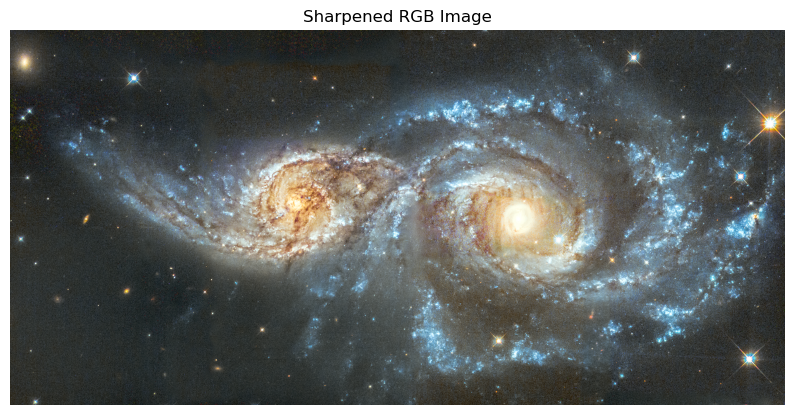

In [19]:

from scipy.ndimage import gaussian_filter
import ipywidgets as widgets
from IPython.display import display


# Unsharp Masking Function
def unsharp_mask(image, sigma=1, strength=1.5):
    blurred = gaussian_filter(image, sigma=sigma)
    sharpened = image + strength * (image - blurred)
    return np.clip(sharpened, 0, 1)

# Generate the initial sharpened image
initial_strength = 1.5
sharpened_rgb_image = np.stack([
    unsharp_mask(red_image_norm, sigma=1, strength=initial_strength),
    unsharp_mask(green_image_norm, sigma=1, strength=initial_strength),
    unsharp_mask(blue_image_norm, sigma=1, strength=initial_strength)
], axis=-1)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(sharpened_rgb_image, origin='lower')
ax.set_title('Sharpened RGB Image')
ax.axis('off')

# Slider setup
strength_slider = widgets.FloatSlider(value=initial_strength, min=0.1, max=5.0, step=0.1, description='Strength:')
display(strength_slider)

def update_image(change):
    strength = change['new']
    sharpened_rgb_image = np.stack([
        unsharp_mask(red_image_norm, sigma=1, strength=strength),
        unsharp_mask(green_image_norm, sigma=1, strength=strength),
        unsharp_mask(blue_image_norm, sigma=1, strength=strength)
    ], axis=-1)
    im.set_data(sharpened_rgb_image)
    fig.canvas.draw_idle()

strength_slider.observe(update_image, names='value')

plt.show()

# Close the FITS files
G.close()
R.close()
B.close()


# For Intensity Distribution  and Doppler Shift

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


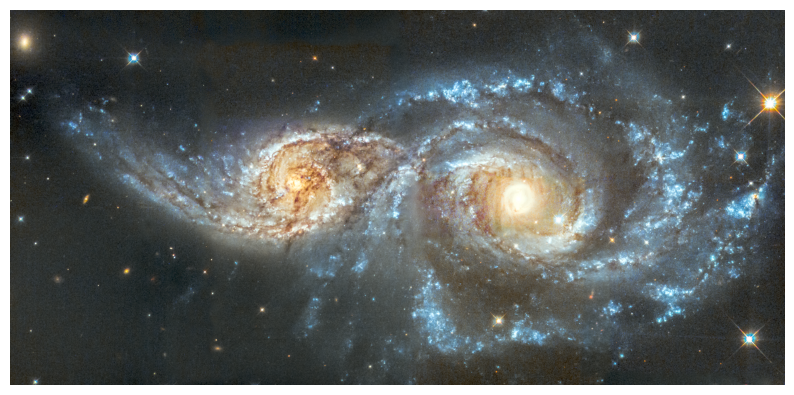

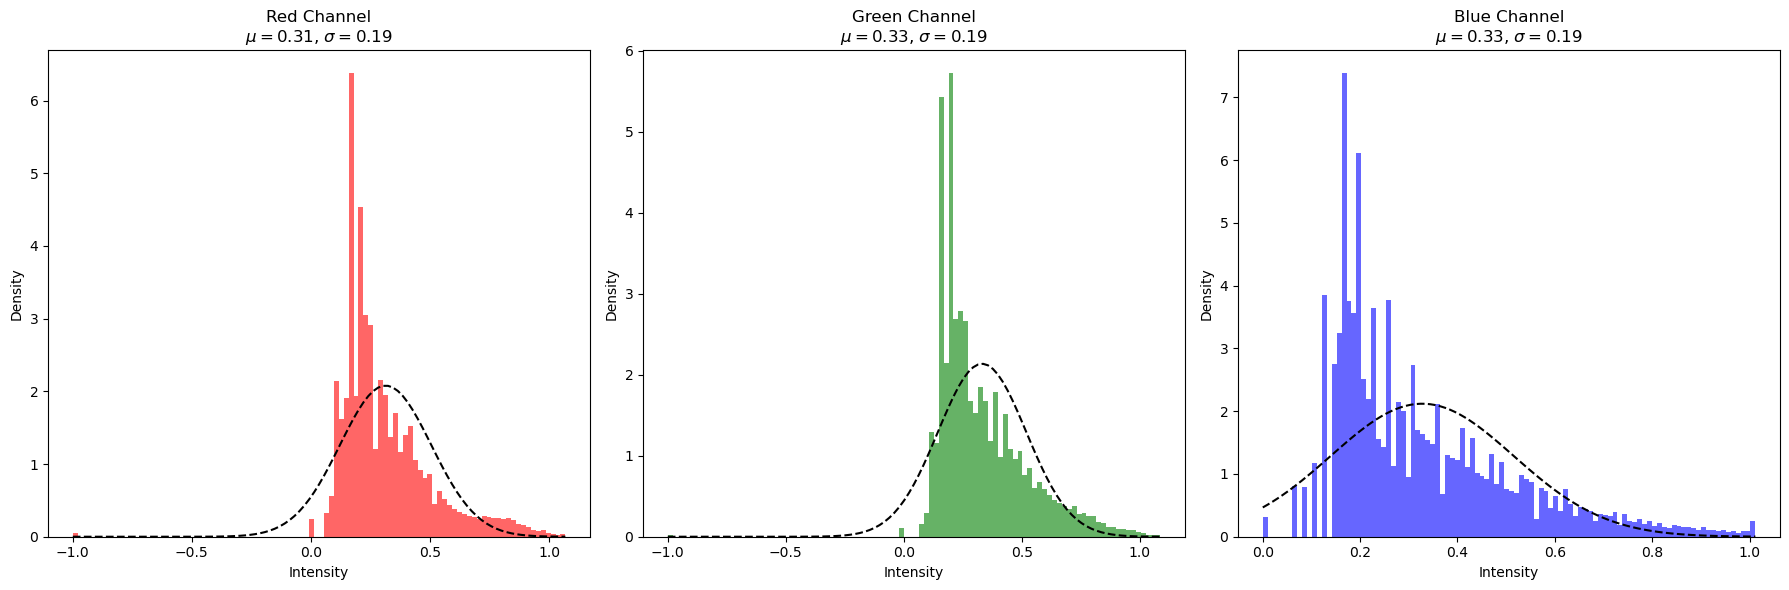

In [30]:
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
from scipy.stats import norm

# Normalize the images
norm_green = simple_norm(green_image, 'sqrt', percent=99.5)
norm_red = simple_norm(red_image, 'sqrt', percent=99.5)
norm_blue = simple_norm(blue_image, 'sqrt', percent=99.5)

green_image_norm = norm_green(green_image)
red_image_norm = norm_red(red_image)
blue_image_norm = norm_blue(blue_image)

# Stack the images to create an RGB image
rgb_image = np.stack([red_image_norm, green_image_norm, blue_image_norm], axis=-1)

# Create a grayscale intensity image for the color bar
intensity_image = 0.299 * red_image_norm + 0.587 * green_image_norm + 0.114 * blue_image_norm

# Plot the RGB image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, origin='lower')
plt.axis('off')
plt.show()

# Extract color values for histograms
red_values = red_image_norm.flatten()
green_values = green_image_norm.flatten()
blue_values = blue_image_norm.flatten()

# Plot histograms and Gaussian fits
plt.figure(figsize=(18, 6))

for i, (color_values, color_name) in enumerate(zip([red_values, green_values, blue_values], ['Red', 'Green', 'Blue'])):
    plt.subplot(1, 3, i+1)
    
    # Plot the histogram
    counts, bins, _ = plt.hist(color_values, bins=100, density=True, alpha=0.6, color=color_name.lower())
    
    # Fit a Gaussian to the histogram
    mu, sigma = norm.fit(color_values)
    best_fit_line = norm.pdf(bins, mu, sigma)
    
    # Plot the Gaussian fit
    plt.plot(bins, best_fit_line, '--', color='black')
    
    plt.title(f'{color_name} Channel\n$\mu={mu:.2f}$, $\sigma={sigma:.2f}$')
    plt.xlabel('Intensity')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Close the FITS files
G.close()
R.close()
B.close()


# Create Multiple Wavelength Composite Image

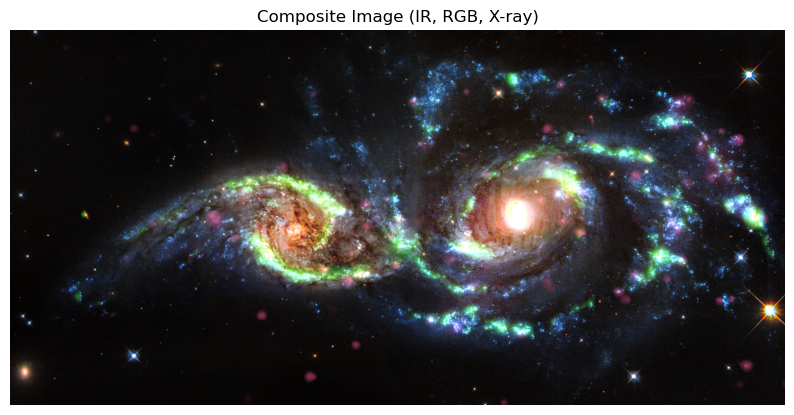

In [31]:
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Paths to the FITS files
xray_file = 'n2207_XRAY.fits'
ir_file = 'n2207_IR.fits'
rgb_files = ['n2207_OPT_R.fits', 'n2207_OPT_G.fits', 'n2207_OPT_B.fits']

# Load the X-ray, IR, and RGB images
xray_data = fits.getdata(xray_file)
ir_data = fits.getdata(ir_file)
r_data = fits.getdata(rgb_files[0])
g_data = fits.getdata(rgb_files[1])
b_data = fits.getdata(rgb_files[2])

# Normalize the data to the range [0, 1]
xray_data = exposure.rescale_intensity(xray_data, in_range='image', out_range=(0, 1))
ir_data = exposure.rescale_intensity(ir_data, in_range='image', out_range=(0, 1))
r_data = exposure.rescale_intensity(r_data, in_range='image', out_range=(0, 1))
g_data = exposure.rescale_intensity(g_data, in_range='image', out_range=(0, 1))
b_data = exposure.rescale_intensity(b_data, in_range='image', out_range=(0, 1))

def update_image(xray_intensity, ir_intensity, rgb_intensity):
    # Apply intensity scaling to each component
    scaled_xray = xray_data * xray_intensity
    scaled_ir = ir_data * ir_intensity
    scaled_rgb = np.dstack([r_data * rgb_intensity, g_data * rgb_intensity, b_data * rgb_intensity])
    
    # Convert X-ray data to a colored image (e.g., pink/purple hue)
    xray_colored = np.dstack([scaled_xray * 1.0, scaled_xray * 0.3, scaled_xray * 0.6])
    
    # Combine the IR data into a green hue image
    ir_colored = np.dstack([scaled_ir * 0.2, scaled_ir * 1.0, scaled_ir * 0.2])
    
    # Create the composite image
    composite_image = scaled_rgb + ir_colored + xray_colored
    
    # Clip the image to make sure the pixel values are within the valid range [0, 1]
    composite_image = np.clip(composite_image, 0, 1)
    
    # Display the composite image
    plt.figure(figsize=(10, 6))
    plt.imshow(composite_image)
    plt.title('Composite Image (IR, RGB, X-ray)')
    plt.axis('off')
    plt.show()

update_image(xray_intensity=0.5, ir_intensity=0.8, rgb_intensity=1.0)


# Project Task 2:
    

   ## 2. Create an interactive intensity slider for controlling filter 
  ## Objective: Provide a dynamic way to adjust the intensity of filters and visualize changes.
  ### Tasks: Implement interactive sliders, update composite image based on slider values, and display.